<a href="https://colab.research.google.com/github/Mihail-Chr/projects/blob/main/ML/car_cost/car_deep_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install polars cuml-cu11 cupy-cuda12 catboost cudf-cu12 numba phik cudf-polars-cu12
# cupy-cuda11x lightgbm scikit-learn matplotlib seaborn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requ

In [2]:
!pip install cudf-cu11 cuml-cu11 cugraph-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cupy-cuda11x

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 GB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 192.6 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 597, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 597 (delta 128), reused 82 (delta 82), pack-reused 434 (from 3)
Receiving objects: 100% (597/597), 196.59 KiB | 16.38 MiB/s, done.
Resolving deltas: 100% (302/302), done.
Installing RAPIDS remaining 25.04 libraries
Using Python 3.11.13 environment at: /usr
Resolved 176 packages in 12.14s
  × Failed to download `libraft-cu12==25.4.0`
  ├─▶ Failed to fetch:
  │   `https://pypi.nvidia.com/libraft-cu12/libraft_cu12-25.4.0-py3-none-manylinux_2_28_x86_64.whl`
  ├─▶ error sending request for url
  │   (https://pypi.nvidia.com/libraft-cu12/libraft_cu12-25.4.0-py3-none-manylinux_2_28_x86_64.whl)
  ├─▶ client error (SendRequest)
  ├─▶ http2 error
  ╰─▶ connection error detected: flow-control protocol violated
  help: `libraft-cu12` (v25.4.0) was included because `pylibraft-cu12`
        (v25.4.0) depends on `li

In [6]:
!pip install cudf-cu12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: cuda-bindings
    Found existing installation: cuda-bindings 11.8.7
    Uninstalling cuda-bindings-11.8.7:
      Successfully uninstalled cuda-bindings-11.8.7
  Attempting uninstall: cuda-python
    Found existing installation: cuda-python 11.8.7
    Uninstalling cuda-python-11.8.7:
      Successfully uninstalled cuda-python-11.8.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu11 25.6.0 requires cuda-python<12.0a0,>=11.8.5, but you have cuda-python 12.9.0 which is incompatible.
cuml-cu11 25.6.0 requires cuda-python<12.0a0,>=11.8.5, but you have cuda-python 12.9.0 which is incompatible.
rmm-cu11 25.6.0 requires cuda-python<12.0a0,>=11.8.5, but you have cuda-python 12.9.0 which is incompatible.
pylibraft-cu11 25.6.0 requires cuda-python<12.0a0,>=11.8.5,

In [1]:
import torch
print(torch.cuda.is_available())


True


In [2]:
import time
import polars as pl
import cudf
import cupy as cp
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from phik.report import plot_correlation_matrix
from phik import phik_matrix


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from cuml.linear_model import LinearRegression as cuLinearRegression, Ridge as cuRidge
from cuml.neighbors import KNeighborsRegressor as cuKNeighborsRegressor
from cuml.ensemble import RandomForestRegressor as cuRandomForestRegressor
from cuml.preprocessing import StandardScaler as cuStandardScaler
from catboost import CatBoostRegressor
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')
RANDOM_STATE = 255

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.11/dist-packages/cupy/_environment.py:584: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy-cuda11x, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


Mounted at /content/drive


In [58]:

def transform_bool(data,  true_val, false_val):
    return (data == true_val).cast(pl.Int32)

In [29]:
def preprocess_data(df):
    # Обработка пропусков
    df = df.with_columns([
        pl.col("VehicleType").fill_null("unknown"),
        pl.col("Gearbox").fill_null("unknown"),
        pl.col("Model").fill_null("unknown"),
        pl.col("FuelType").fill_null("unknown"),
        pl.col("Repaired").fill_null("unknown")
    ])

    # Фильтрация по году регистрации
    df = df.filter(
        (pl.col("RegistrationYear") >= 1950) &
        (pl.col("RegistrationYear") <= 2023)
    )

    # Фильтрация по цене
    df = df.filter(
        (pl.col("Price") >= 100) &
        (pl.col("Price") <= 150000)
    )

    # Преобразование bool
    df = df.with_columns([
        transform_bool(pl.col("Repaired"), "yes", "no").alias("Repaired")
    ])

    # Удаление ненужных столбцов
    df = df.drop(["DateCrawled", "DateCreated", "LastSeen", "NumberOfPictures", "PostalCode"])

    return df

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pl.read_csv('/content/drive/MyDrive/data/autos.csv')

'PHIK матрица '

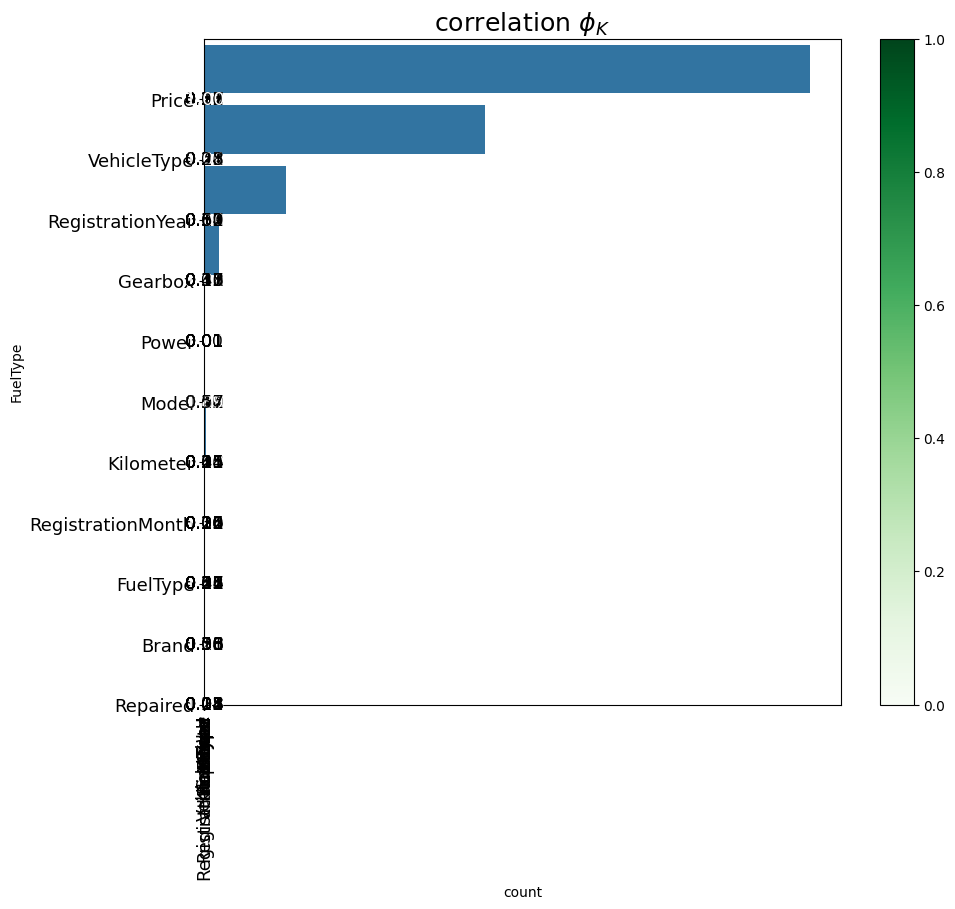

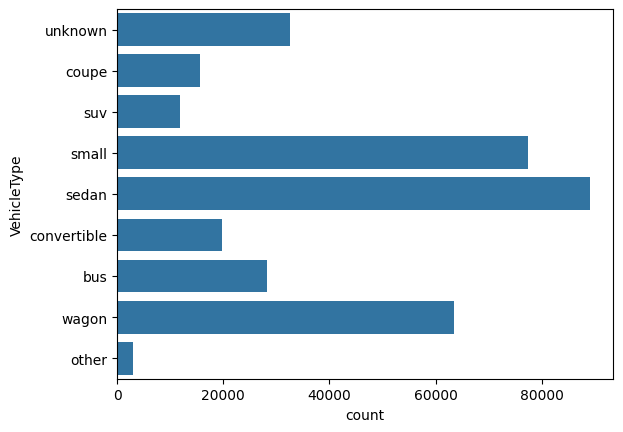

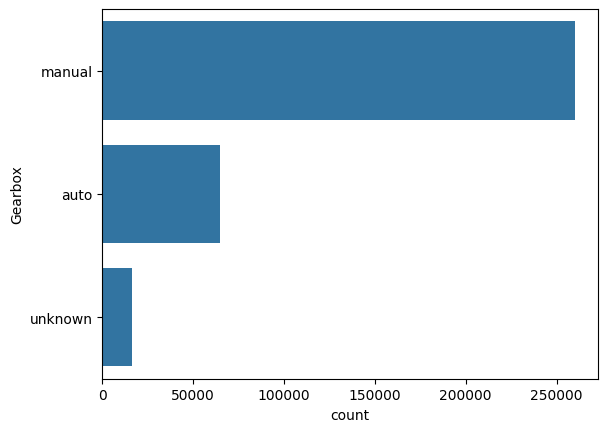

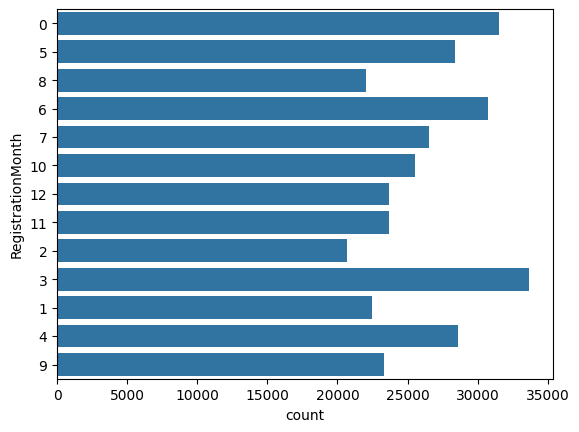

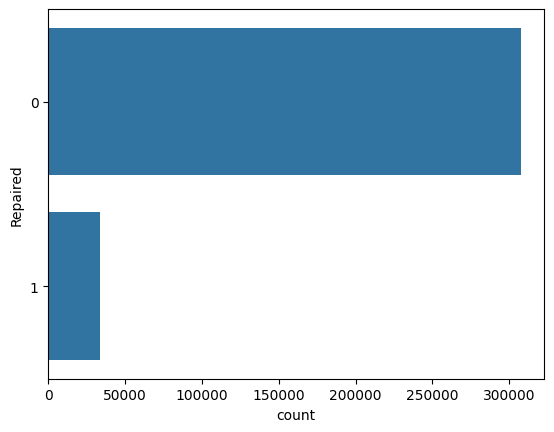

'Price'

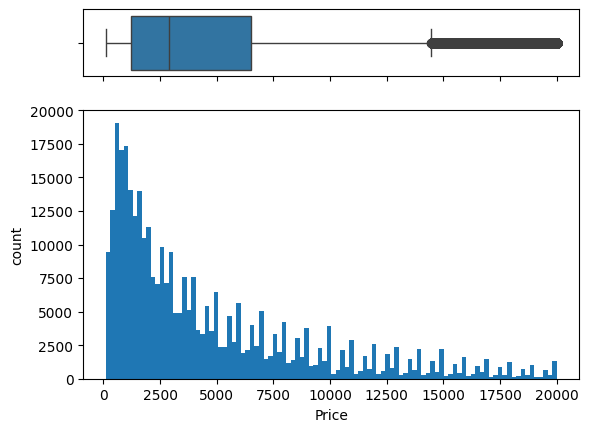

'RegistrationYear'

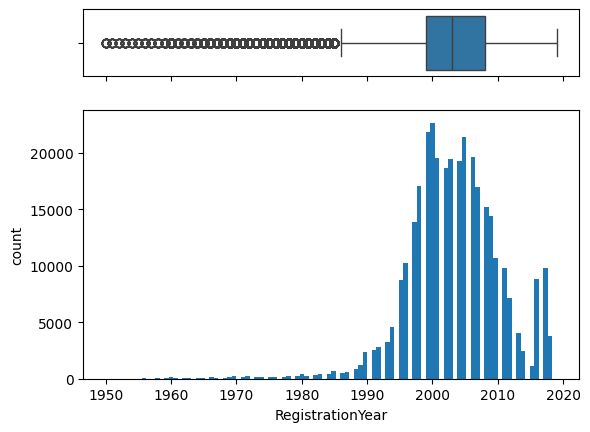

'Power'

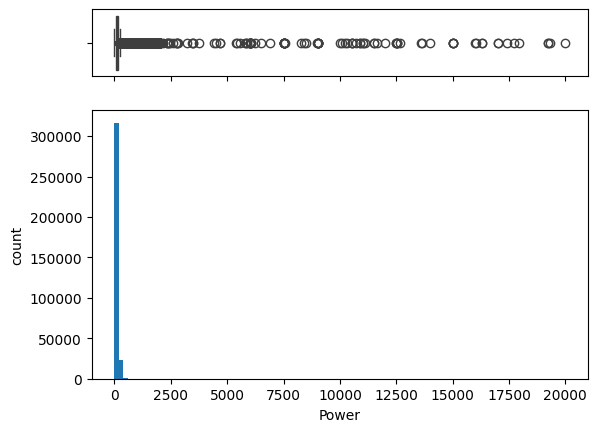

'Kilometer'

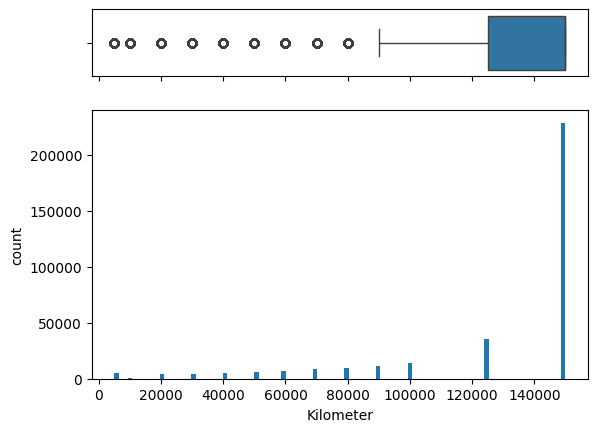

In [62]:
df = pl.read_csv('/content/drive/MyDrive/data/autos.csv')
df = preprocess_data(df)
#df1 = df.to_pandas()
cat_col = ['Brand','Model','FuelType','VehicleType','Gearbox','RegistrationMonth','Repaired']
num_col = ['Price','RegistrationYear','Power','Kilometer']

col_auto_df = ['Price','Brand','Model','RegistrationYear','RegistrationMonth',
           'FuelType','VehicleType','Gearbox','Power','Kilometer','Repaired']

interval_cols = num_col
avto_df = df.clone()
avto_df[cat_col] = avto_df[cat_col].cast(pl.String)
# 'PHIK матрица'
display ('PHIK матрица ')

phik_overview = avto_df.to_pandas().phik_matrix( interval_cols=interval_cols)#,n_jobs=-1)
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.3,
    figsize=(10,9))

for i in cat_col:
    if avto_df[i].n_unique()<20:
        sns.countplot(y=i, data=avto_df)
        plt.show()

for n in num_col:
    display(n)
    fig, (ax_box, ax_hist) = plt.subplots(2,sharex = True,gridspec_kw = {'height_ratios': (.20, .80)})
    sns.boxplot(x = avto_df[n], ax = ax_box)
    plt.hist(avto_df[n],bins=100)
    ax_box.set(xlabel = '')
    ax_hist.set(xlabel = n)
    ax_hist.set(ylabel = 'count')
    plt.show()

In [64]:
!pip install cudf-polars-cu12

In [ ]:
# Разделение данных на признаки и целевую переменную
X = df.drop(['Price','Brand'])
y = df['Price']
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Подготовка данных для моделей на CPU и GPU
# Для CPU моделей: оставляем в pandas (или numpy)
# Для GPU моделей: конвертируем в cuDF
# Конвертируем X_train, X_test, y_train, y_test в cuDF
X_train_cudf = cudf.X_train
X_test_cudf = cudf.X_test #.DataFrame.from_pandas
y_train_cudf = cudf.Series(y_train.values)  # предполагая, что y_train - pandas Series
y_test_cudf = cudf.Series(y_test.values)

In [ ]:
# Определение числовых и категориальных признаков
numerical_cols = ["RegistrationYear", "Power", "Kilometer", "RegistrationMonth"]
categorical_cols = ["VehicleType", "Gearbox", "Model", "FuelType", "Brand", "Repaired"]

# Создание предобработчика для CPU
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='drop'
)

# Предобработка данных на CPU
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Предобработка на GPU
scaler = cuStandardScaler()
X_train_cudf[numerical_cols] = scaler.fit_transform(X_train_cudf[numerical_cols])
X_test_cudf[numerical_cols] = scaler.transform(X_test_cudf[numerical_cols])

# OneHotEncoding на GPU
for col in categorical_cols:
    onehot = X_train_cudf[col].one_hot_encoded(list(X_train_cudf[col].unique()))
    X_train_cudf = cudf.concat([X_train_cudf.drop(col), onehot], axis=1)

    onehot = X_test_cudf[col].one_hot_encoded(list(X_test_cudf[col].unique()))
    X_test_cudf = cudf.concat([X_test_cudf.drop(col), onehot], axis=1)

In [ ]:
models_cpu = {
     "Dummy": DummyRegressor(),
     "SVR": SVR(),
     "PassiveAggressive": PassiveAggressiveRegressor(),
     "SGD": SGDRegressor(),

 }
# Модели, которые будем запускать на GPU через cuML
models_gpu_ml = {
     "cuLinearRegression": cuLinearRegression(),
     "cuRidge": cuRidge(),
     "cuKNeighbors": cuKNeighborsRegressor(),
     "cuRandomForest": cuRandomForestRegressor(),
 }
# Модели, которые могут использовать GPU через свои реализации (CatBoost, LGBM)
models_gpu_other = {
     "CatBoost": CatBoostRegressor(verbose=0, allow_writing_files=False, task_type='GPU'),
     "LGBM": LGBMRegressor(device='gpu'),
 }

In [ ]:
 results = []
  # 1. Обучение моделей на CPU (используем X_train, y_train в формате pandas)
 for name, model in models_cpu.items():
        start = time.time()
        model.fit(X_train, y_train)
        train_time = time.time() - start
        start = time.time()
        y_pred = model.predict(X_test)
        predict_time = time.time() - start
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        results.append({
            'model': name,
            'train_time': train_time,
            'predict_time': predict_time,
            'rmse': rmse,
            'mae': mae,
            'type': 'CPU'
        })

# 2. Обучение моделей на GPU через cuML (используем X_train_cudf, y_train_cudf)
for name, model in models_gpu_ml.items():
     start = time.time()
     model.fit(X_train_cudf, y_train_cudf)
     train_time = time.time() - start
     start = time.time()
     y_pred = model.predict(X_test_cudf)
     predict_time = time.time() - start
     # Переведем предсказания в numpy для метрик
     y_pred_np = y_pred.to_array()  # для cuML
     rmse = np.sqrt(mean_squared_error(y_test, y_pred_np))
     mae = mean_absolute_error(y_test, y_pred_np)
     results.append({
         'model': name,
         'train_time': train_time,
         'predict_time': predict_time,
         'rmse': rmse,
         'mae': mae,
         'type': 'GPU (cuML)'
     })
# 3. Обучение CatBoost и LGBM на GPU (но данные в pandas)
for name, model in models_gpu_other.items():
     start = time.time()
     model.fit(X_train, y_train)
     train_time = time.time() - start
     start = time.time()
     y_pred = model.predict(X_test)
     predict_time = time.time() - start
     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
     mae = mean_absolute_error(y_test, y_pred)
     results.append({
         'model': name,
         'train_time': train_time,
         'predict_time': predict_time,
         'rmse': rmse,
         'mae': mae,
         'type': 'GPU (other)'
     })
# Соберем результаты в DataFrame
results_df = pl.DataFrame(results)

In [ ]:
results = []

# CPU модели
cpu_results = train_evaluate_models(
    models_cpu, X_train_processed, y_train, X_test_processed, y_test, 'CPU'
)
results.extend(cpu_results)

# cuML GPU модели
gpu_ml_results = train_evaluate_models(
    models_gpu_ml, X_train_cudf, y_train_cudf, X_test_cudf, y_test_cudf, 'GPU (cuML)'
)
results.extend(gpu_ml_results)

# Другие GPU модели
gpu_other_results = train_evaluate_models(
    models_gpu_other, X_train_processed, y_train, X_test_processed, y_test, 'GPU (other)'
)
results.extend(gpu_other_results)

# Создаем DataFrame с результатами
results_df = pl.DataFrame(results)

In [ ]:
# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='rmse', y='model', data=results_df.to_pandas(), hue='device')
plt.title('RMSE by Model and Device')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='train_time', y='model', data=results_df.to_pandas(), hue='device')
plt.title('Training Time by Model and Device')
plt.xlabel('Training Time (s)')
plt.ylabel('Model')
plt.xscale('log')
plt.show()

# Выбор лучшей модели
best_model_info = results_df.sort('rmse').row(0)
best_model_name = best_model_info['model']
best_model_type = best_model_info['device']

print(f"Best model: {best_model_name} ({best_model_type})")
print(f"RMSE: {best_model_info['rmse']:.2f}")
print(f"MAE: {best_model_info['mae']:.2f}")
print(f"Training time: {best_model_info['train_time']:.2f}s")

In [ ]:
 Оценка важности признаков для лучшей модели
if best_model_name == "cuRandomForest":
    model = models_gpu_ml["cuRandomForest"]
    importances = model.feature_importances_
    features = X_train_cudf.columns.to_arrow().to_pylist()
elif best_model_name == "RandomForest":
    model = models_cpu["RandomForest"]
    importances = model.feature_importances_
    features = preprocessor.get_feature_names_out()
elif best_model_name == "CatBoost":
    model = models_gpu_other["CatBoost"]
    importances = model.get_feature_importance()
    features = preprocessor.get_feature_names_out()
else:
    print("Feature importance not available for this model")
    importances = None

if importances is not None:
    # Сортировка важностей
    sorted_idx = np.argsort(importances)[::-1][:20]
    sorted_features = [features[i] for i in sorted_idx]
    sorted_importances = importances[sorted_idx]

    # Визуализация
    plt.figure(figsize=(12, 8))
    sns.barplot(x=sorted_importances, y=sorted_features)
    plt.title(f'Top 20 Feature Importances ({best_model_name})')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [ ]:
# Визуализация предсказаний лучшей модели
if "cu" in best_model_name:
    model = models_gpu_ml.get(best_model_name)
    y_pred = model.predict(X_test_cudf).to_array()
elif best_model_name in models_gpu_other:
    model = models_gpu_other[best_model_name]
    y_pred = model.predict(X_test_processed)
else:
    model = models_cpu[best_model_name]
    y_pred = model.predict(X_test_processed)

# График фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Prices ({best_model_name})')
plt.show()


In [ ]:
# Распределение ошибок
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.show()